![alt text](images/Kusto.jpg "Kusto Magic")

# Kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from PyPI and install/update
(if latest version is already installed you can skip this step)

In [ ]:
#!pip install Kqlmagic --no-cache-dir --upgrade

## If you want to pre-set defaults, set environment varaible, before activation notebook, or within notebook
- **KQLMAGIC_NOTEBOOK_APP** - set the notebook application (default **jupyternotebook**)
- **KQLMAGIC_LOAD_MODE** - set the kqlmagic load mode (default **verbose**). If silent, it will load without welcome output
- **KQLMAGIC_CONFIGURATION** - modify the default configuration, key=value pairs must be separated by a **semicolon**

- **KQLMAGIC_CONNECTION_STR** - set the default connection string (default **None**). If set it will connect to it on Kqlmagic load

In [ ]:
# you can try it within the notebook, by setting the environment variable using %env magic

#%env KQLMAGIC_NOTEBOOK_APP=jupyterlab
#%env KQLMAGIC_LOAD_MODE=silent
#%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"
#%env KQLMAGIC_CONFIGURATION="show_init_banner=True;check_magic_version=False;show_what_new=False"

#%env KQLMAGIC_CONNECTION_STR=AzureDataExplorer://username='michabin@microsoft.com';cluster='help';database='Samples'
#%env KQLMAGIC_CONNECTION_STR=AzureDataExplorer://code;cluster='help';database='Samples'

#%env KQLMAGIC_LOG_LEVEL=DEBUG
#%env KQLMAGIC_LOG_FILE_MODE=Append
# %env KQLMAGIC_LOG_FILE=michael.log
#%env KQLMAGIC_LOG_FILE_PREFIX=myLog
#%env KQLMAGIC_DEVICE_CODE_NOTIFICATION_EMAIL=SMTPEndPoint='endpoint';SMTPPort='port';sendFrom='from';sendFromPassword='password';sendTo='to';context='text'

## Add Kqlmagic to notebook magics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


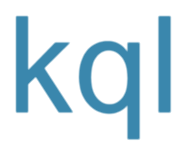

In [1]:
%reload_ext Kqlmagic

  - ### <span style="color:#82CAFA">*Note: information is included in the kqlmagic banner, and in the note below it, with version and location of the open source code*</span>
  - ### <span style="color:#82CAFA">*Note: after kql magic was loaded, kql reference was added to Help menu (Help tab)*</span>

## Get help

In [ ]:
%kql --help "help" -popup_window

## Get Azure Data Explorer reference

In [ ]:
%kql --help "AzureDataExplorer"

## Connect to database@cluster
there are few options to authenticate with Azure Data Explorer (Kusto):<br>
```python
%kql azure_data-Explorer://code;cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql azure_data-Explorer://tenant='<tenant-id>';clientid='<aad-appid>';clientsecret='<aad-appkey>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql azure_data-Explorer://tenant='<tenant-id>';certificate='<certificate>';certificate_thumbprint='<thumbprint>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql azure_data-Explorer://tenant='<tenant-id>';certificate_pem_file='<pem_filename>';certificate_thumbprint='<thumbprint>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql azure_data-Explorer://username='<username>';password='<password>';cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```
```python
%kql azureDataExplorer://anonymous;cluster='<cluster-name>';database='<database-name>';alias='<database-friendly-name>'
```

Notes:<br>
(1) username/password works only on corporate network.<br>
(2) alias is optional.<br>
(3) if credentials are missing, and a previous connection was established the credentials will be inherited.<br>
(4) if secret (password / clientsecret / thumbprint) is missing, user will be prompted to provide it.<br>
(5) if cluster is missing, and a previous connection was established the cluster will be inherited.<br>
(6) if tenant is missing, and a previous connection was established the tenant will be inherited.<br>
(7) if only the database change, a new connection can be set as follow: 
```<new-database-name>@<cluster-name>```<br>
(8) **a not quoted value, is a python expression, that is evaluated and its result is used as the value. This is how you can parametrize the connection string** 
<br>(9) anonymous authentication, is NO authentication, for the case that your cluster is local.

In [ ]:
%kql azureDataExplorer://code;cluster='help';database='Samples'

  - ### <span style="color:#82CAFA">*Note - popup window that opened with the database@cluster schema*</span>
  - ### <span style="color:#82CAFA">*Note - Help menu contains the database@cluster schema*</span>

## Get help on connection string, how to authenticate and get access to you data resource

In [ ]:
%kql --help "conn" -popup_window

## Once connected you can query the current database@cluster

In [ ]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10

## Python code can access the result by the \_ variable

In [ ]:
_

## Converts result data to a dataframe

In [ ]:
df = _.to_dataframe()
df

In [ ]:
df.head()

In [ ]:
df.State

In [ ]:
df.min()

In [ ]:
df.to_json()

In [ ]:
df.columns

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [ ]:
_

In [ ]:
_kql_raw_result_

In [ ]:
_

## Show a chart, render the query to the proper chart

In [ ]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10 | render piechart title='my apple pie' 

  - ### <span style="color:#82CAFA">*Note: the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [ ]:
%kql my_bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [ ]:
my_bar_chart

## Access table data

In [ ]:
my_bar_chart.show_table()

In [ ]:
my_bar_chart[1]

In [ ]:
my_bar_chart[1][1:]

In [ ]:
my_bar_chart[1]['State']

In [ ]:
my_bar_chart[1:5]

In [ ]:
storm_events = %kql StormEvents | project StartTime, State, StormSummary | limit 3
storm_events

In [ ]:
storm_events[1:3]

In [ ]:
storm_events[1]['StartTime']

In [ ]:
storm_events[1]['State']

In [ ]:
storm_events[1]['StormSummary']

In [ ]:
storm_events[1]['StormSummary']['Details']

In [ ]:
storm_events[1]['StormSummary']['Details']['Description']

  - ### <span style="color:#82CAFA">*Note: that you can access directly dynamic object data.*</span>

In [ ]:
df = storm_events.to_dataframe()
df

In [ ]:
df['StormSummary'][0]['Details']['Description']

  - ### <span style="color:#82CAFA">*Note: that access to data in dataframe is different, you first specify the column and then the row.*</span>

In [ ]:
df['StartTime'][1]

  - ### <span style="color:#82CAFA">*Note: that datetime in dataframe is Timestamp.*</span>

## Cell mixed with single line kql queries 

In [ ]:
%kql bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

  - ### <span style="color:#82CAFA">*Note: single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [ ]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: that this is a multiline magic, it starts with \%\%. It can include only kql code*</span>

## Show last chart result as a table

In [ ]:
_.show_table()

## Show last result in a popup window

In [ ]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

  - ### <span style="color:#82CAFA">*Note: when you F5, you loose the latest chart display state*</span>

## Show last chart result as a table in a popup window

In [ ]:
_kql_raw_result_.popup_table()

## More complex chart

In [ ]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 10 
    | render piechart title='my pie chart #2' 

## Convert result data to dictionary of columns

In [ ]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

In [ ]:
_kql_raw_result_.to_csv('csv_file.csv')
#%cat csv_file.csv

# Get last kql query attributes 

## Query string

In [ ]:
_kql_raw_result_.query

## Query render title

In [ ]:
_kql_raw_result_.title

## Query render visualization

In [ ]:
_kql_raw_result_.visualization

## Number of records in query response 

In [ ]:
_kql_raw_result_.records_count

## List of columns in query table response

In [ ]:
_kql_raw_result_.columns_name

## Kqlmagic time metric (in seconds)

In [ ]:
_kql_raw_result_.start_time

In [ ]:
_kql_raw_result_.end_time

In [ ]:
_kql_raw_result_.elapsed_timespan

## Query connection database@cluster

In [ ]:
_kql_raw_result_.connection

## Query Options (settings) 

In [ ]:
_kql_raw_result_.options

## Completion query information (query metadata)

In [ ]:
_kql_raw_result_.completion_query_info

## Completion query resource consumption (query metadata)

In [ ]:
_kql_raw_result_.completion_query_resource_consumption

In [ ]:
_kql_raw_result_.completion_query_resource_consumption['resource_usage']['cache']['memory']['hits']

## Completion query data set info (query metadata)

In [ ]:
 _kql_raw_result_.dataSetCompletion

## Query raw json response

In [ ]:
_kql_raw_result_.raw_json

In [ ]:
_kql_raw_result_.raw_json[0]['Version']

In [ ]:
_kql_raw_result_.raw_json[1]['Columns']

In [ ]:
_kql_raw_result_.raw_json[1]['Columns'][1]['ColumnType']

# Advanced part

## Kql query with option -c2lv (-columns_to_local_vars)

In [ ]:
%%kql -c2lv 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: option are specified before the query*</span>
  - ### <span style="color:#82CAFA">*Note: c2lv is abbreviation of columns_to_local_vars options*</span>
  - ### <span style="color:#82CAFA">*Note: columns_to_local_vars option returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [ ]:
State

In [ ]:
count_

  - ### <span style="color:#82CAFA">*Note - current database@cluster is always shown*</span>

## Kql query with negated option -f (-feedback)

In [ ]:
%%kql -!feedback 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: the feedback message 'Done..... records' was not displayed because of the negated feedback option*</span>
  - ### <span style="color:#82CAFA">*Note: option is negated by adding \! before the option*</span>
  - ### <span style="color:#82CAFA">*Note: full option name instead of abbreviation can be used too*</span>
  - ### <span style="color:#82CAFA">*Note: feedback option is on by default, so to turn it off, it must be negated*</span>

## Get default value of option feedback (f)

In [ ]:
%config Kqlmagic.feedback

  - ### <span style="color:#82CAFA">*Note: options have defaults, and can be accessed to read or modify using %config magic*</span>

## Set default value of option feedback (f) to False

In [ ]:
%config Kqlmagic.feedback=False
%config Kqlmagic.feedback

In [ ]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 5

  - ### <span style="color:#82CAFA">*Note: feedback message was not displayed, because the default feedback option was set to False*</span>

In [ ]:
%config Kqlmagic.feedback=True
%config Kqlmagic.feedback

## Show all option defaults with help

In [ ]:
%config Kqlmagic

## Show query results in a popup window

In [ ]:
%%kql -pw 
    let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
    | limit 1000
    | extend e1 = randn()
    | extend e2 = randn()
    | extend e3 = randn()
    | extend e4 = randn()
    | extend e5 = randn()
    | project c, e1,e2,e3,e4,e5
    | render scatterchart title="Michael's chart"

  - ### <span style="color:#82CAFA">*Note: popup_window option (abbr: pw) cause the result to be displayed in a popup window*</span>

## Empty table

In [ ]:
%kql StormEvents | summarize count() by State | sort by count_ | extend count2 = count_*count_ | limit 0

In [ ]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_ * count_ 
    | limit 0 
    | render piechart title='my chart'

In [ ]:
len(_kql_raw_result_)

In [ ]:
_kql_raw_result_.popup()

In [ ]:
_kql_raw_result_.show_table()

In [ ]:
df = _kql_raw_result_.to_dataframe()
df

In [ ]:
df.to_json()

In [ ]:
_kql_raw_result_.raw_json

## Kql request with fork - return multiple tables

In [ ]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | extend count2 = count_ * count_ 
    | fork (limit 10) (project State | limit 5)

In [ ]:
_kql_raw_result_.fork_result(1)

## Submit same query

In [ ]:
 _kql_raw_result_.submit()

In [ ]:
 _kql_raw_result_.fork_result(1)

## Refresh query

In [ ]:
_kql_raw_result_.fork_result(1).refresh()

In [ ]:
_kql_raw_result_.fork_result(0)

In [ ]:
_kql_raw_result_